In [3]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.3.1-cp312-cp312-win_amd64.whl.metadata (26 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12.1-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2024.6.0-py3-none-any.whl.metadata (11 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.1-cp312-cp312-win_amd64.whl (159.7 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached filelock-3.14.0-py3-none-any.whl (12 kB)
Using cached fsspec-2024.6.0-py3-none-any.whl (176 kB)
Using 

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

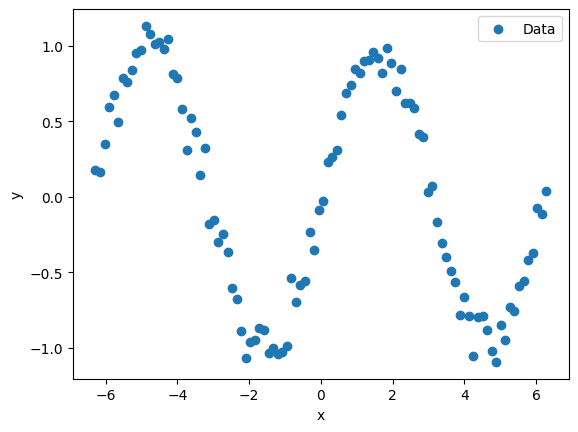

In [5]:
# Create dataset
np.random.seed(0)
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sin(x) + 0.1 * np.random.randn(100)

# Visualize dataset
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

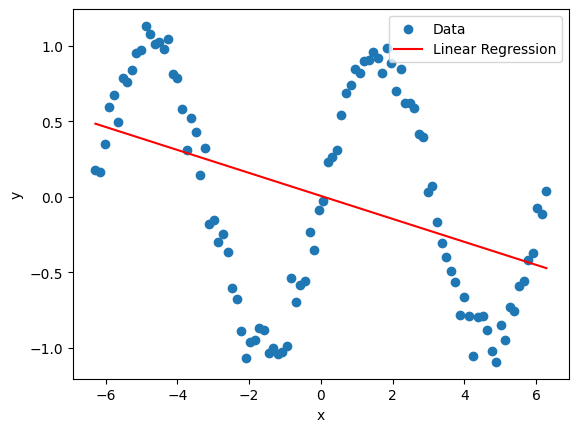

In [6]:
# Linear regression model
X = np.vstack((np.ones(x.shape), x)).T #np.vstack will stack your rows vertically and hstack will stack the columns vertically.
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Predictions
y_pred_linear = X @ theta

# Plot results
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred_linear, color='red', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Simple neural network with, 1 input feature, one hidden layer with 10 neuron, and 1 output feature (1 neuron in output layer): Total (20 + 11 = 31) parameters

Epoch 0, Loss: 18.687232762624816
Epoch 1000, Loss: 0.3463223955013073
Epoch 2000, Loss: 0.2571281457771495
Epoch 3000, Loss: 0.212011379957021
Epoch 4000, Loss: 0.18069336074164422
Epoch 5000, Loss: 0.15736926938365411
Epoch 6000, Loss: 0.13998411625321805
Epoch 7000, Loss: 0.12714905338354818
Epoch 8000, Loss: 0.11791595865284028
Epoch 9000, Loss: 0.11154523929036103


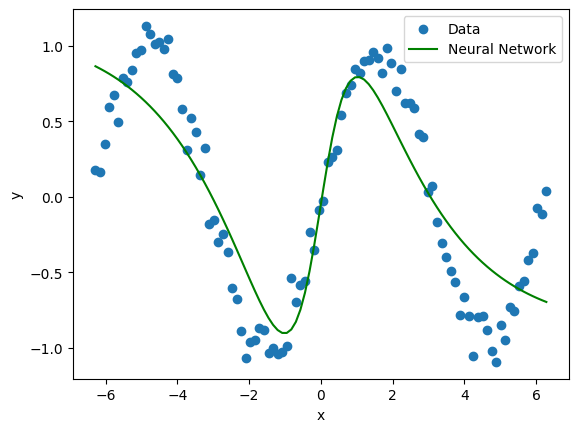

In [8]:
# Neural network model Without Pytorch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Initialize parameters
input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
num_epochs = 10000

# Training
for epoch in range(num_epochs):
    # Forward pass working on all 11 neurons.
    Z1 = x.reshape(-1, 1) @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    y_pred_nn = Z2
    
    # Compute loss (mean squared error)
    loss = np.mean((y_pred_nn - y.reshape(-1, 1)) ** 2)
    
    # Backward pass
    dZ2 = y_pred_nn - y.reshape(-1, 1)
    dW2 = A1.T @ dZ2 / x.shape[0]
    db2 = np.mean(dZ2, axis=0, keepdims=True)
    
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = x.reshape(-1, 1).T @ dZ1 / x.shape[0]
    db1 = np.mean(dZ1, axis=0, keepdims=True)
    
    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot results
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred_nn, color='green', label='Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Popular activation Functions

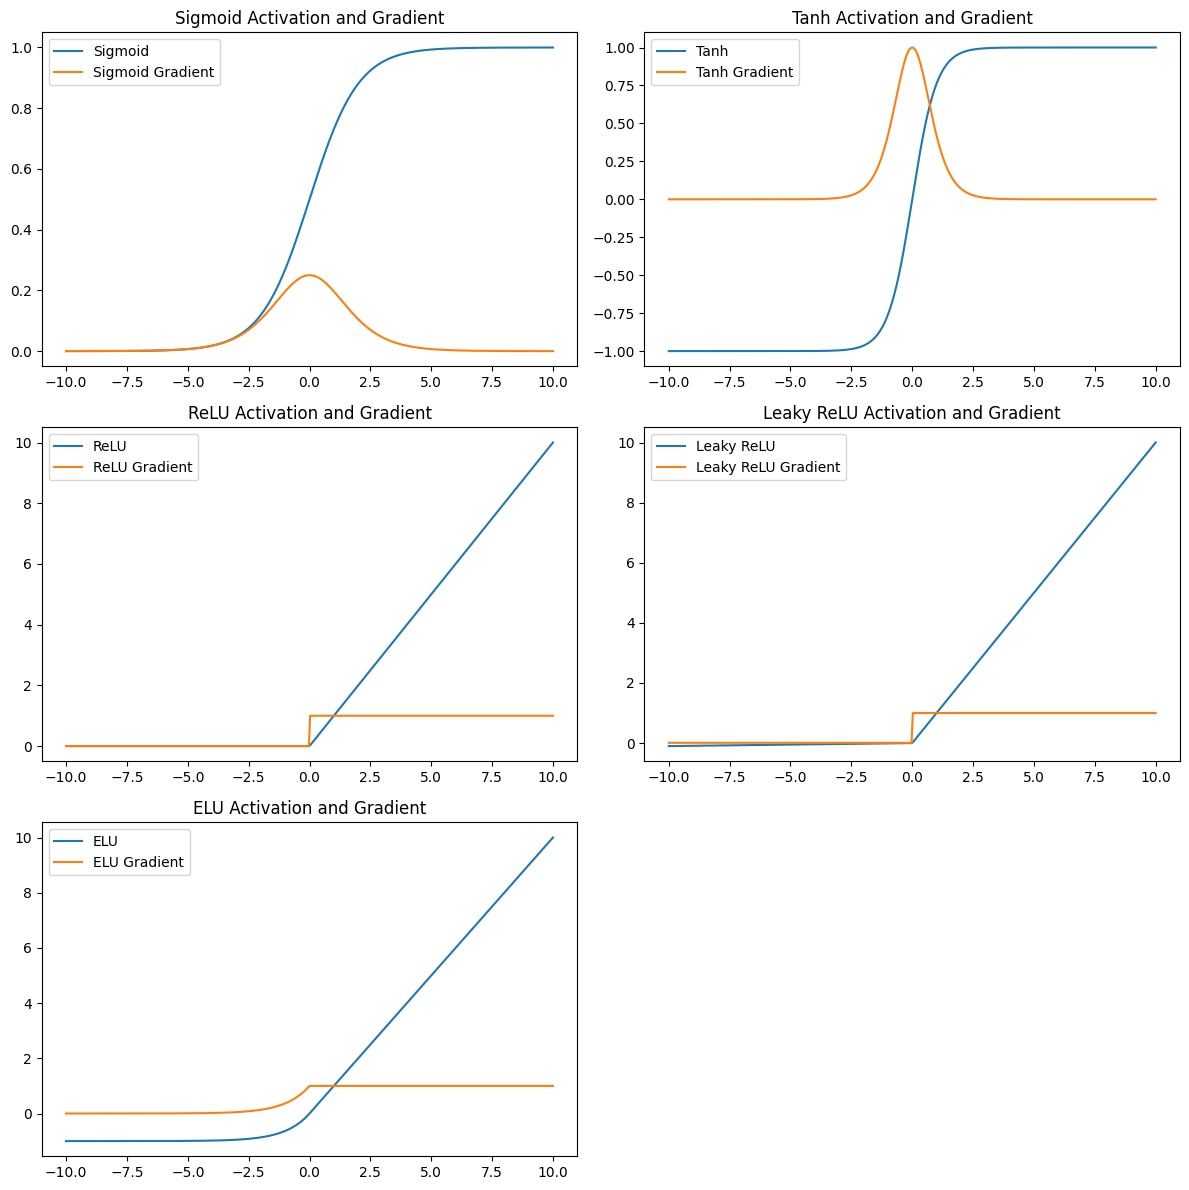

In [9]:
# Define activation functions and their gradients
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x) ** 2

def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return np.where(x > 0, 1, 0)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_grad(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_grad(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Generate data
x = np.linspace(-10, 10, 400)

# Apply activation functions and their gradients
y_sigmoid = sigmoid(x)
y_sigmoid_grad = sigmoid_grad(x)

y_tanh = tanh(x)
y_tanh_grad = tanh_grad(x)

y_relu = relu(x)
y_relu_grad = relu_grad(x)

y_leaky_relu = leaky_relu(x)
y_leaky_relu_grad = leaky_relu_grad(x)

y_elu = elu(x)
y_elu_grad = elu_grad(x)

# Plot activation functions and their gradients
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_sigmoid_grad, label='Sigmoid Gradient')
plt.title('Sigmoid Activation and Gradient')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_tanh_grad, label='Tanh Gradient')
plt.title('Tanh Activation and Gradient')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_relu_grad, label='ReLU Gradient')
plt.title('ReLU Activation and Gradient')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, y_leaky_relu, label='Leaky ReLU')
plt.plot(x, y_leaky_relu_grad, label='Leaky ReLU Gradient')
plt.title('Leaky ReLU Activation and Gradient')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, y_elu, label='ELU')
plt.plot(x, y_elu_grad, label='ELU Gradient')
plt.title('ELU Activation and Gradient')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Create a tensor
tensor = torch.tensor([[1, 2], [3, 4]])
print(tensor)

# Perform operations
print(tensor + 2)
print(tensor * tensor)

tensor([[1, 2],
        [3, 4]])
tensor([[3, 4],
        [5, 6]])
tensor([[ 1,  4],
        [ 9, 16]])


In [11]:
# Backward command takes gradient
x = torch.tensor(9.0, requires_grad=True)
y = (x - 2) ** 2
y.backward()
print(x.grad)

tensor(14.)


In [12]:
import torch.nn as nn

# ReLU activation
relu = nn.ReLU()

# Sigmoid activation
sigmoid = nn.Sigmoid()

# Tanh activation
tanh = nn.Tanh()

# Linear Layer
linear = nn.Linear(3, 4)  # This is not a activation function but defines the size of your 1 layer (input_feature_size, output_feature_size)

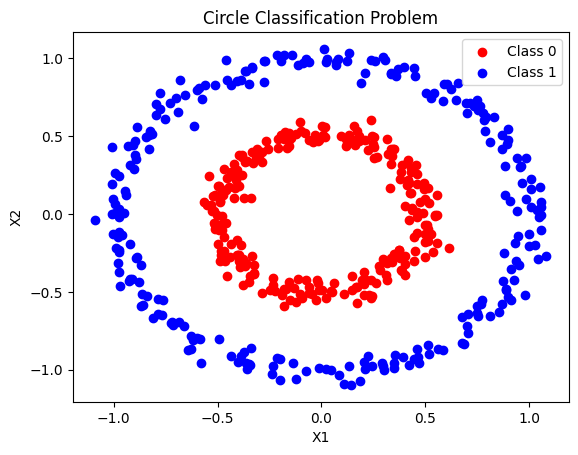

In [18]:
# Generate circle classification problem data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Plot the data
plt.scatter(X[y.squeeze() == 1][:, 0], X[y.squeeze() == 1][:, 1], color='red', label='Class 0')
plt.scatter(X[y.squeeze() == 0][:, 0], X[y.squeeze() == 0][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Circle Classification Problem')
plt.show()

In [19]:
# Logistic Regression Model in Pytorch
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
logistic_model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(logistic_model.parameters(), lr=0.1)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad() # Clears the previous gradient, since we donot want to accumulate the gradients
    outputs = logistic_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

In [20]:
# Evaluate the model
with torch.no_grad():  # no_grad ensures that parameters are not updated while testing the model
    y_pred_log_reg = (logistic_model(X) > 0.5).float()
    accuracy_log_reg = (y_pred_log_reg == y).sum().item() / y.size(0)
    print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.50


C:\Users\vvagh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


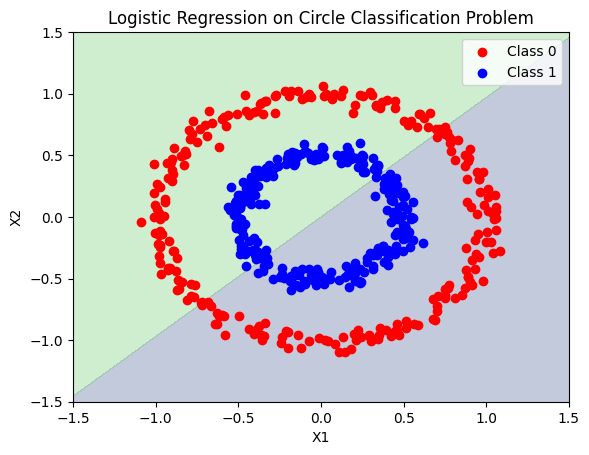

In [21]:
# Plot decision boundary
xx, yy = torch.meshgrid(torch.linspace(-1.5, 1.5, 100), torch.linspace(-1.5, 1.5, 100))
grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
with torch.no_grad():
    Z = logistic_model(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(X[y.squeeze() == 0][:, 0], X[y.squeeze() == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y.squeeze() == 1][:, 0], X[y.squeeze() == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Logistic Regression on Circle Classification Problem')
plt.show()

# A simple neural network, 2 input feature, 1 hidden layer with 10 neurons and 1 output feature (output layer will have one neuron): 31 Parameters

In [22]:
# Simple Neural Network using Pytorch
class MLPModel(nn.Module): #nn.module is the base class for all the neural networks in torch
    def __init__(self):
        super(MLPModel, self).__init__()
        self.hidden = nn.Linear(2, 10) # 2 input features and 10 neurons
        self.relu = nn.ReLU()   # ReLU activation for hidden layer
        self.output = nn.Linear(10, 1) # Output layer recieves 10 input features from previous layer and outputs only one feature (since regression task)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [23]:
# Initialize the model, loss function, and optimizer
mlp_model = MLPModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(mlp_model.parameters(), lr=0.1)

# Train the model
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = mlp_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

In [24]:
# Evaluate the model
with torch.no_grad():
    y_pred_mlp = (mlp_model(X) > 0.5).float()
    accuracy_mlp = (y_pred_mlp == y).sum().item() / y.size(0)
    print(f"MLP Accuracy: {accuracy_mlp:.2f}")

MLP Accuracy: 1.00


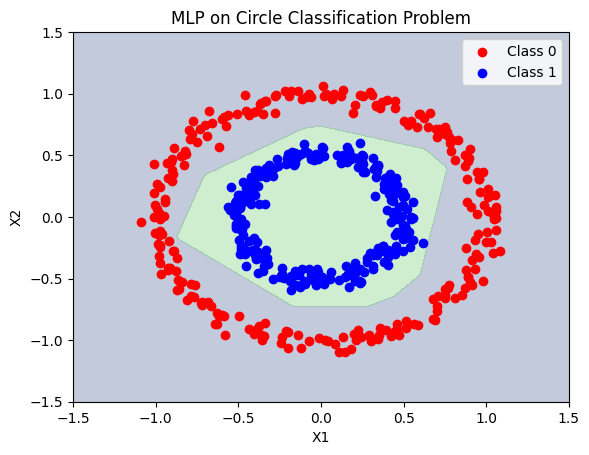

In [26]:
# Plot decision boundary
with torch.no_grad():
    Z = mlp_model(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(X[y.squeeze() == 0][:, 0], X[y.squeeze() == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y.squeeze() == 1][:, 0], X[y.squeeze() == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('MLP on Circle Classification Problem')
plt.show()


In [28]:
import pandas as pd

# Load the dataset
file_path = r"weather_prediction_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [29]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

missing_values

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

# basic data analysis, statistical summary, correlation analysis, time series plot, and distribution histogram plot

In [30]:
data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3654,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2004-12-31 12:00:00,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
min,2000-01-01 00:00:00,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2002-07-02 06:00:00,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2004-12-31 12:00:00,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2007-07-02 18:00:00,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2010-01-01 00:00:00,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000
std,NaN,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924


In [31]:
key_features = [
    'BASEL_temp_mean', 'BASEL_humidity', 'BASEL_precipitation', 'BASEL_sunshine',
    'STOCKHOLM_temp_mean', 'STOCKHOLM_precipitation',
    'TOURS_temp_mean', 'TOURS_humidity', 'TOURS_precipitation'
]

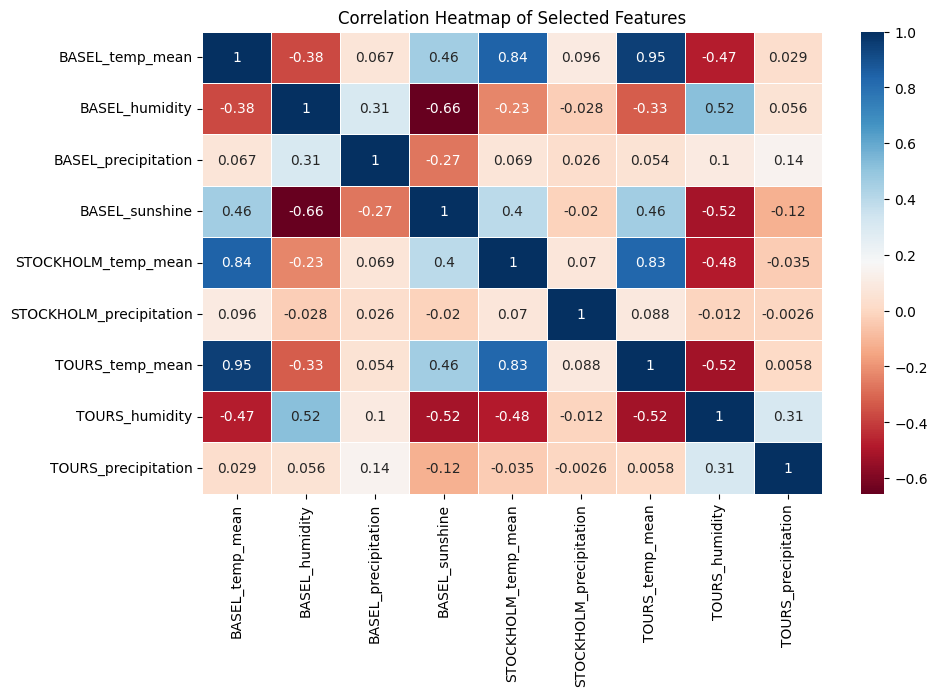

In [41]:
import seaborn as sns

# Compute the correlation matrix for the selected features
correlation_matrix = data[key_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

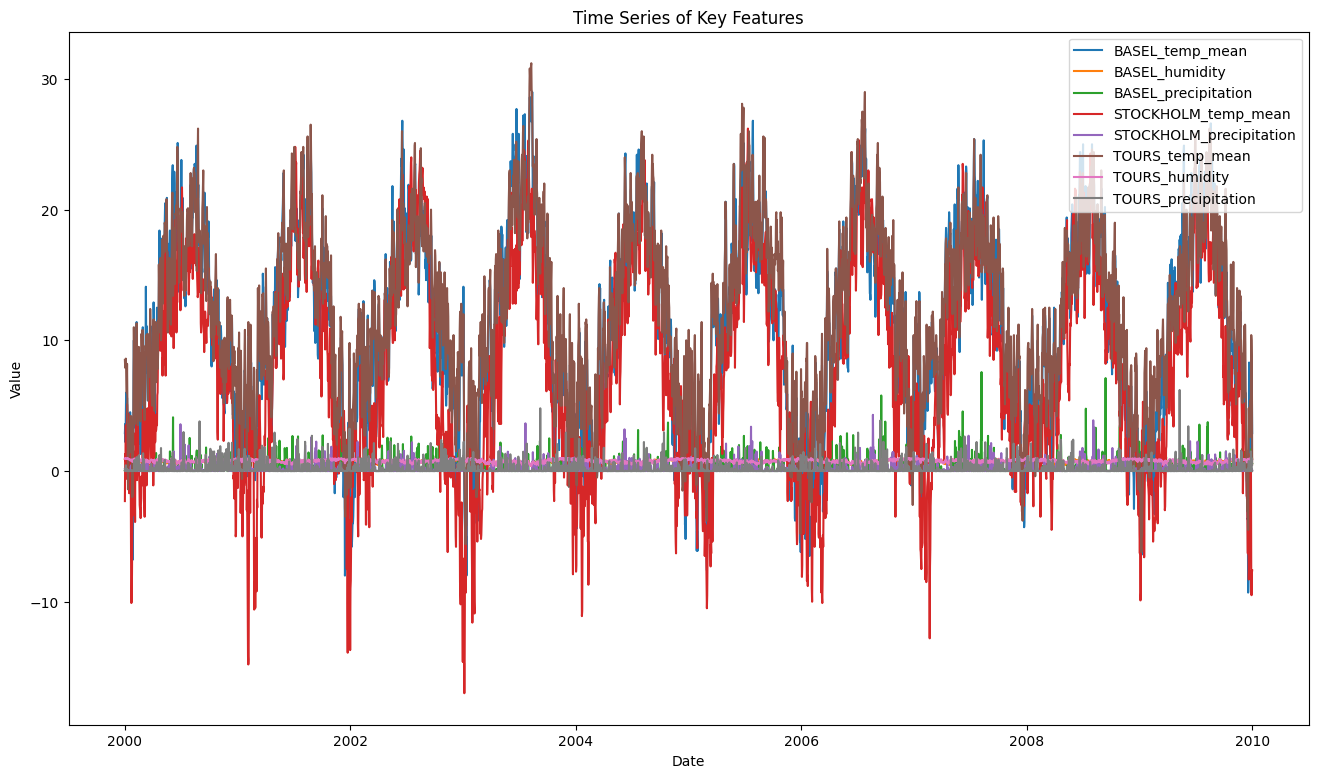

In [42]:
# Time series plots for mean temperature, humidity, and precipitation

# Set the date as the index for time series plotting
data.set_index('DATE', inplace=True)

# Define the features to plot
time_series_features = [
    'BASEL_temp_mean', 'BASEL_humidity', 'BASEL_precipitation',
    'STOCKHOLM_temp_mean', 'STOCKHOLM_precipitation',
    'TOURS_temp_mean', 'TOURS_humidity', 'TOURS_precipitation'
]

# Plotting time series for each feature
plt.figure(figsize=(16, 9))
for feature in time_series_features:
    plt.plot(data.index, data[feature], label=feature)

plt.title('Time Series of Key Features')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

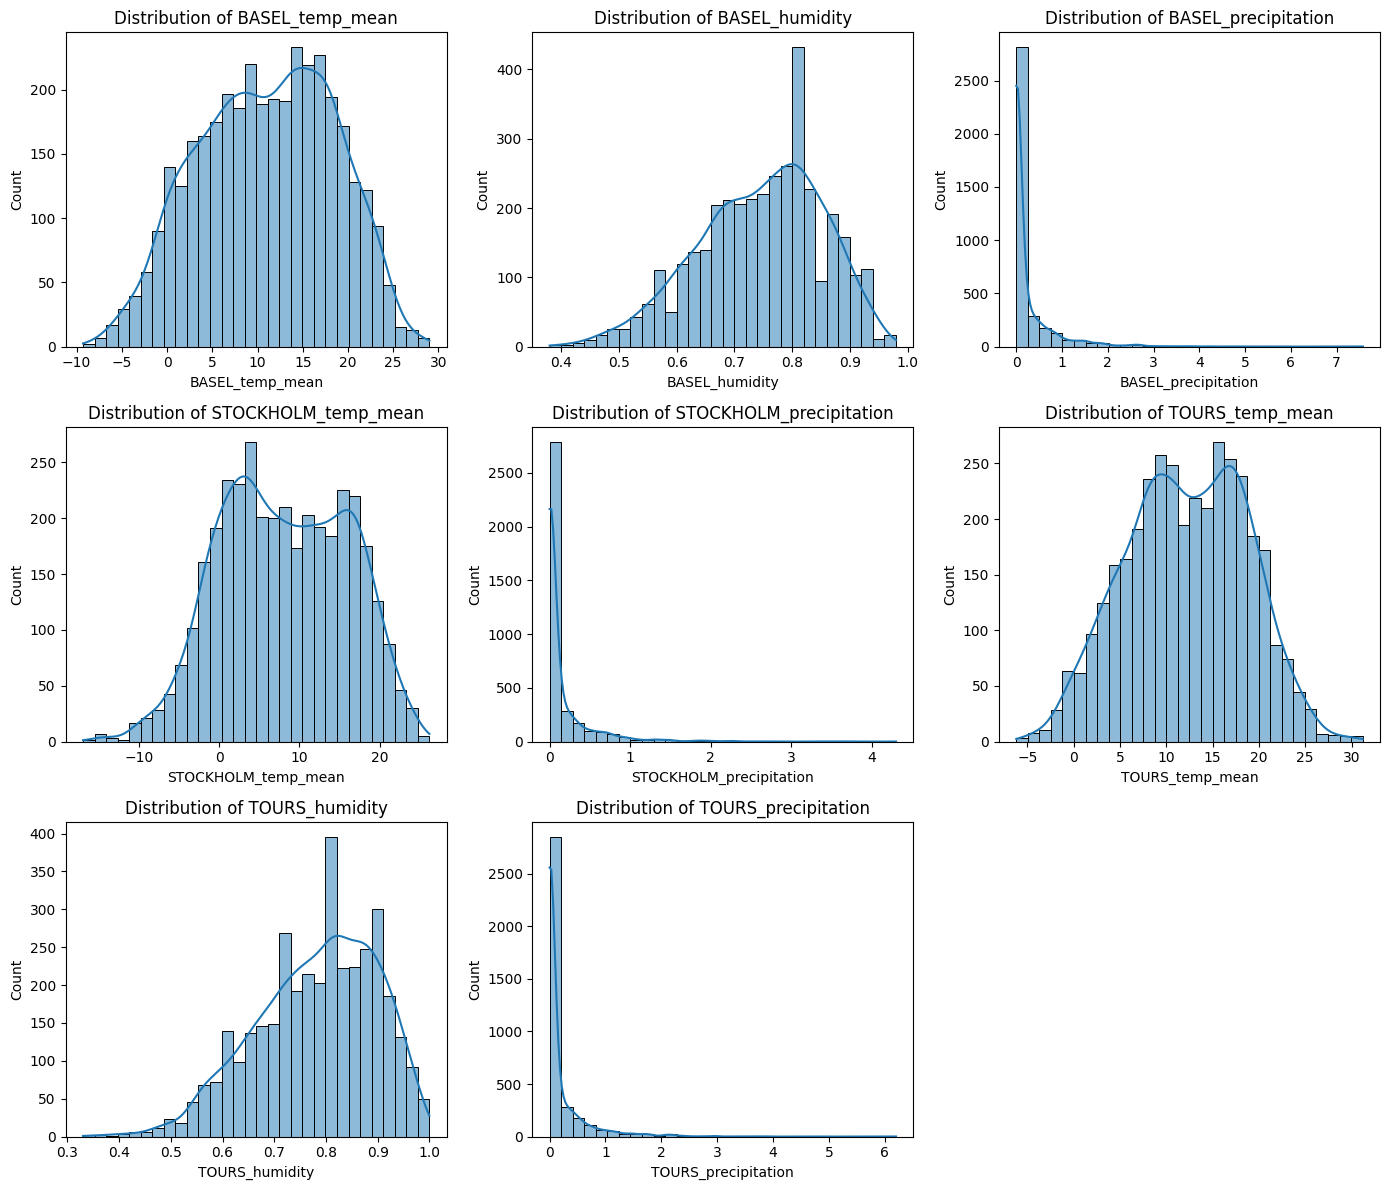

In [43]:
# Plotting distribution plots for key features

# Define a function to create histograms for each feature
def plot_histograms(features, data, bins=30):
    plt.figure(figsize=(14, 12))
    for i, feature in enumerate(features):
        plt.subplot(len(features) // 3 + 1, 3, i + 1)
        sns.histplot(data[feature], bins=bins, kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Call the function with the selected features
plot_histograms(time_series_features, data)

In [44]:
data = data.sort_values('DATE')

In [45]:
# Select relevant features and target for Tours
features = data[['TOURS_pressure', 'TOURS_humidity', 'TOURS_wind_speed']].dropna().values
target = data['TOURS_temp_mean'].dropna().values.reshape(-1, 1)  # Predicting temperature

# Scale the data to be in the range [0, 1]
scaler_features = StandardScaler()
scaler_target = StandardScaler()
scaled_features = scaler_features.fit_transform(features)
scaled_target = scaler_target.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.15, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [53]:
# Define the neural network
class WeatherMLP(nn.Module):
    def __init__(self, input_size):
        super(WeatherMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64) # In this case our input size is 3 and first hidden layer will have 128 neurons
        self.relu = nn.ReLU()   # reLU activation for first hidden layer
        self.fc2 = nn.Linear(64, 32) # Each neuron in second hidden layer will recieve 128 input features from previous layer and output 64 features as it is having 64 neurons
        self.output = nn.Linear(32, 1) # Output layer will recieve 64 input features from previous layer and output only one feature (since regression task)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.output(x)
        return x

In [54]:
# Create an instance of the model
model = WeatherMLP(input_size=X_train_tensor.shape[1])

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor) # forward pass
    loss = criterion(outputs, y_train_tensor) # loss calculation
    loss.backward()  # backward pass
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/5000], Loss: 0.5443
Epoch [2000/5000], Loss: 0.5200
Epoch [3000/5000], Loss: 0.5058
Epoch [4000/5000], Loss: 0.4937
Epoch [5000/5000], Loss: 0.4841


In [55]:
# Evaluate the model
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.5756


In [56]:
# Inverse transform the scaled predictions and targets
predictions = scaler_target.inverse_transform(predictions.numpy())
y_test_actual = scaler_target.inverse_transform(y_test_tensor.numpy())

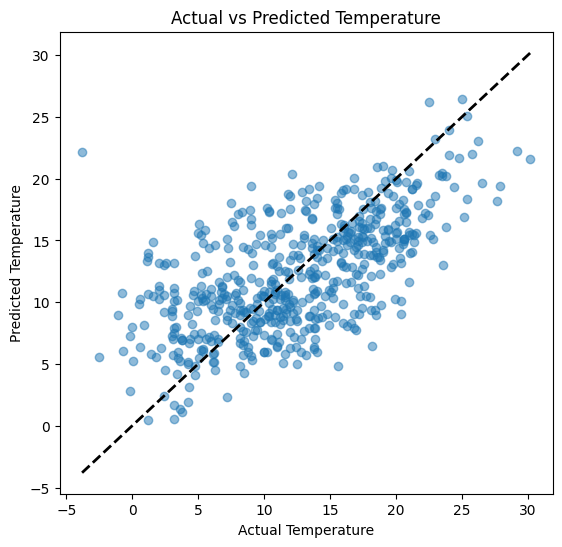

In [57]:
# Enhanced Visualization
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted temperatures
plt.subplot(1, 2, 1)
plt.scatter(y_test_actual, predictions, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

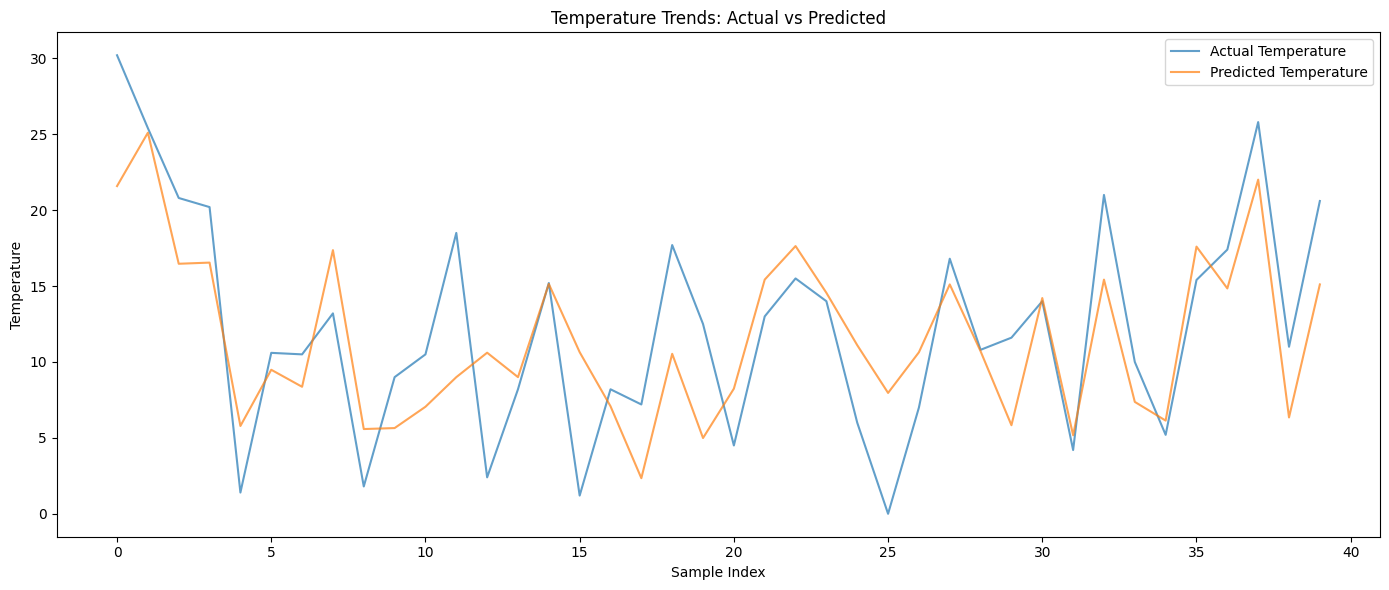

In [58]:
# Enhanced Time Series Visualization
plt.figure(figsize=(14, 6))

# Time series plot to compare the trends of actual and predicted temperatures for 40 instances
plt.plot(y_test_actual[:40], label='Actual Temperature', alpha=0.7)
plt.plot(predictions[:40], label='Predicted Temperature', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.title('Temperature Trends: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [100/2000], Loss: 0.7319
Epoch [200/2000], Loss: 0.7245
Epoch [300/2000], Loss: 0.7243
Epoch [400/2000], Loss: 0.7243
Epoch [500/2000], Loss: 0.7243
Epoch [600/2000], Loss: 0.7243
Epoch [700/2000], Loss: 0.7243
Epoch [800/2000], Loss: 0.7243
Epoch [900/2000], Loss: 0.7243
Epoch [1000/2000], Loss: 0.7243
Epoch [1100/2000], Loss: 0.7243
Epoch [1200/2000], Loss: 0.7243
Epoch [1300/2000], Loss: 0.7243
Epoch [1400/2000], Loss: 0.7243
Epoch [1500/2000], Loss: 0.7243
Epoch [1600/2000], Loss: 0.7243
Epoch [1700/2000], Loss: 0.7243
Epoch [1800/2000], Loss: 0.7243
Epoch [1900/2000], Loss: 0.7243
Epoch [2000/2000], Loss: 0.7243
Test Loss: 0.6459


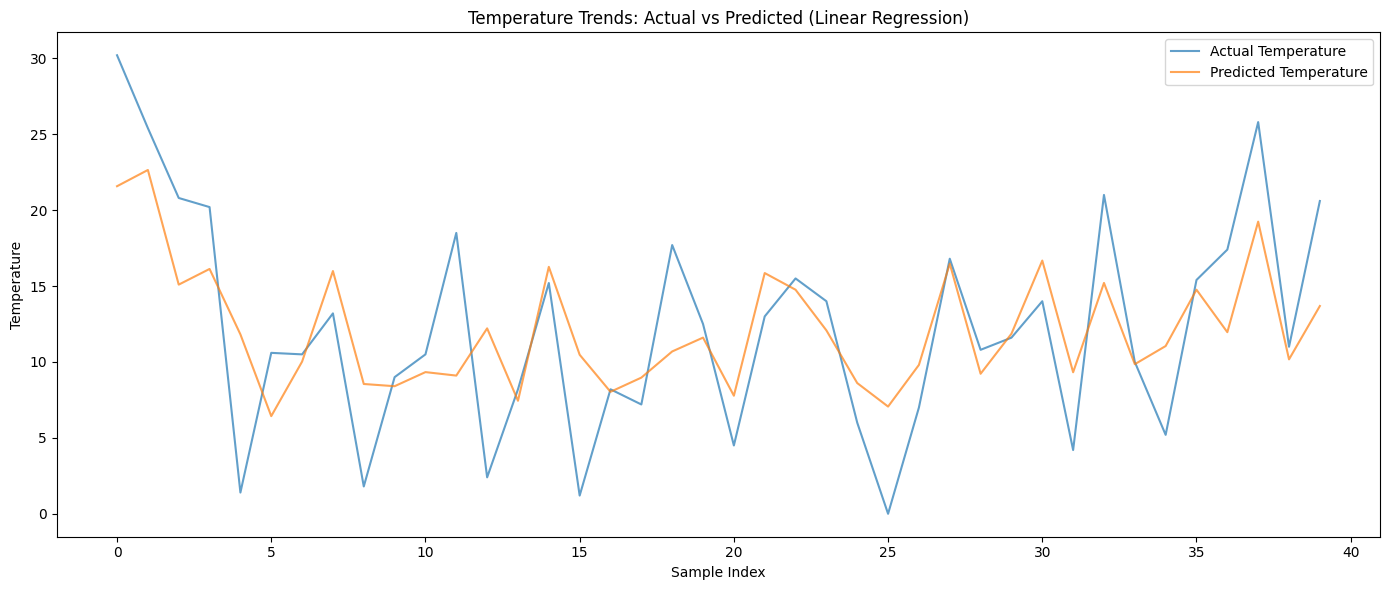

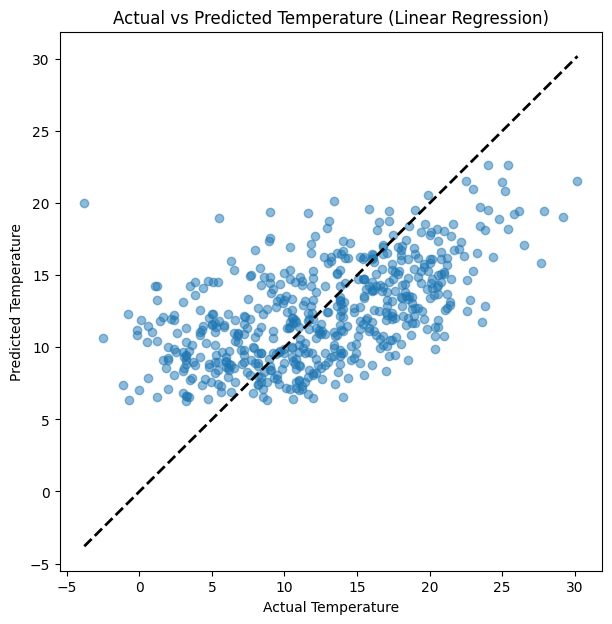

In [59]:
# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Create an instance of the model
model = LinearRegressionModel(input_size=X_train_tensor.shape[1])

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 2000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

# Inverse transform the scaled predictions and targets
predictions = scaler_target.inverse_transform(predictions.numpy())
y_test_actual = scaler_target.inverse_transform(y_test_tensor.numpy())

# Enhanced Time Series Visualization
plt.figure(figsize=(14, 6))

# Time series plot to compare the trends of actual and predicted temperatures
plt.plot(y_test_actual[:40], label='Actual Temperature', alpha=0.7)
plt.plot(predictions[:40], label='Predicted Temperature', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.title('Temperature Trends: Actual vs Predicted (Linear Regression)')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot of actual vs predicted temperatures
plt.figure(figsize=(7, 7))
plt.scatter(y_test_actual, predictions, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (Linear Regression)')
plt.show()